In [25]:
import asf_search as asf
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

In [2]:
results = asf.search(platform=asf.PLATFORM.SENTINEL1, maxResults=100)

In [10]:
S1A = []
S1B = []
ascend_ID = []
descend_ID = []
for i in range(len(results)):
    if 'Sentinel-1A' in results[i].properties['platform']:
        S1A.append(i)
    else:
        S1B.append(i)
    if 'ASCENDING' in results[i].properties['flightDirection']:
        ascend_ID.append(i)
    else:
        descend_ID.append(i)
print(ascend_ID)
print(S1A)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


Text(0.5, 1.0, 'Top 100 Sentinel 1 Observations')

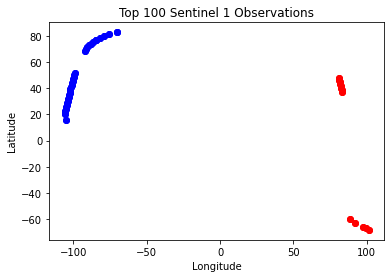

In [19]:
latitude = []
longitude = []
for i in range(len(results)):
    latitude.append(float(results[i].properties['centerLat']))
    longitude.append(float(results[i].properties['centerLon']))
plt.figure('Observations')
plt.clf()
for i in range(len(results)):
    if i in ascend_ID:
        plt.scatter(longitude[i],latitude[i],c='red')
    else:
        plt.scatter(longitude[i],latitude[i],c='blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Top 100 Sentinel 1 Observations')

In [24]:
metadata = []
raw = []
grd_hd = []

for i in range(len(results)):
    if 'METADATA_RAW' in results[i].properties['processingLevel']:
        metadata.append(i)
    elif 'GRD_HD' in results[i].properties['processingLevel']:
        grd_hd.append(i)
    else:
        raw.append(i)


In [30]:
df = pd.DataFrame(
{
    'platform':[],
    'flightDirection':[],
    'centerLat':[],
    'centerLon':[],
    'processingLevel':[]
})
platformlist = []
flightlist = []
latlist = []
lonlist = []
processlist = []
for i in range(len(results)):
    platformlist.append(results[i].properties['platform'])
    flightlist.append(results[i].properties['flightDirection'])
    latlist.append(results[i].properties['centerLat'])
    lonlist.append(results[i].properties['centerLon'])
    processlist.append(results[i].properties['processingLevel'])
    
df.platform = platformlist
df.flightDirection = flightlist
df.centerLat = latlist
df.centerLon = lonlist
df.processingLevel = processlist

In [32]:
gdf = gpd.GeoDataFrame(
df, geometry=gpd.points_from_xy(df.centerLon, df.centerLat))

In [33]:
print(gdf.head())

      platform flightDirection centerLat centerLon processingLevel  \
0  Sentinel-1A       ASCENDING   -60.142   88.8302    METADATA_RAW   
1  Sentinel-1A       ASCENDING   -60.142   88.8302             RAW   
2  Sentinel-1A       ASCENDING  -63.2111   92.1172    METADATA_RAW   
3  Sentinel-1A       ASCENDING  -63.2111   92.1172             RAW   
4  Sentinel-1A       ASCENDING  -65.7866   97.1724    METADATA_RAW   

                     geometry  
0  POINT (88.83020 -60.14200)  
1  POINT (88.83020 -60.14200)  
2  POINT (92.11720 -63.21110)  
3  POINT (92.11720 -63.21110)  
4  POINT (97.17240 -65.78660)  


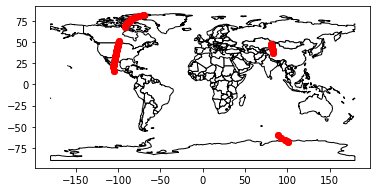

In [37]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black')
gdf.plot(ax=ax, color='red')
plt.show()